<a href="https://colab.research.google.com/github/InstitutodaVinci3/Vancouver/blob/master/MedMepNewData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas Pandas, Numpy e demais necessárias ao trabalho

In [57]:
# importando as bibliotecas básicas e preparando ambiente
import pandas as pd                     # convenção 
import numpy as np                      # convenção 
import random as rd                     # rd não é alias padrão mas sim adotado aqui somente 
import seaborn as sns
import matplotlib.pyplot as plt
# Itens adicionais
import glob
import os
import re
from datetime import datetime
# caminho para os arquivos - indique aqui a pasta onde estão os arquivo
path =r'/content/MedMep/'

#Pré-requisto para leitura dos arquivos
- para leitura dos arquivos diretamente em XLSX é necessário ter os arquivos dispolibilizados no seu Google Dreive, uma vez que ñ possível carregá-los no GitHub
- Para que não precise alterar o código abaixo crie uma pasta no seu Google Drive com o seguinte caminho / nome **MedMep/New_Data_XLSX** e carregue os arquivos TEMPERATURA_VAGINAL, CONSUMO, GLICOSE_UREIA_INSULINA, LEITE_COMPOSIÇÃO, Datalogger (todos com a extensão xlsx) e TempGalpao.xls 
- o caminho final deve ser assim: /content/drive/MyDrive/MedMep/New_Data_ XLSX/*NomeDoArquivo*

In [ ]:
# Pode ser necessário montar o Google Drive se vc ainda não estiver conectado ao mesmo

from google.colab import drive
drive.mount('/content/drive')

# Leitura dos novos arquivos recebidos

**Nomemclatura:**
- arquivo de temperatura vaginal - Data Frame = tv
- arquivo de consumo - Data Frame = cons
- arquivo de glicose e uréia - Data Frame = glu
- arquivo composição do leite - Data Frame = comp
- arquivo Datalogger - Data Frame = dtlog
- arquivo Produção Diária Unificado - Data Frame = prod_dia

##Passo 1 - Lendo o arquivo de temperatura vaginal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [94]:
#tv = pd.read_excel('/content/drive/MyDrive/MedMep/New_Data_ XLSX/TEMPERATURA_VAGINAL.xlsx')
tv = pd.read_excel('https://raw.githubusercontent.com/InstitutodaVinci3/Vancouver/master/Experimento/TEMPERATURA_VAGINAL.xlsx'
, names=["Fase", "Data", "Dia_Experimento", "Id_Animal", "Dieta", "Trat", "Periodo", "Hora", "Temp_Vaginal"])
tv
#tv = pd.read_excel(path +'TEMPERATURA_VAGINAL.xlsx', names=["fase", "data", "dia_experimento", "animal", "dieta", "trat", "periodo", "hora", "temp_vaginal"])

,Fase,Data,Dia_Experimento,Id_Animal,Dieta,Trat,Periodo,Hora,Temp_Vaginal
0,1,2017-07-20,12,2416,2,2,0,07:30:00,NaN
1,1,2017-07-20,12,2416,2,2,0,08:00:00,NaN
2,1,2017-07-20,12,2416,2,2,0,08:30:00,NaN
3,1,2017-07-20,12,2416,2,2,0,09:00:00,NaN
4,1,2017-07-20,12,2416,2,2,0,09:30:00,NaN
...,...,...,...,...,...,...,...,...,...
29047,2,2017-09-27,26,3500,2,3,1,1900-01-11 13:30:00,NaN
29048,2,2017-09-27,26,3500,2,3,1,1900-01-11 14:00:00,NaN
29049,2,2017-09-27,26,3500,2,3,1,1900-01-11 14:30:00,NaN
29050,2,2017-09-27,26,3500,2,3,1,1900-01-11 15:00:00,NaN


In [99]:
tv['Hora']=tv['Hora'].astype('string')

In [100]:
tv.dtypes

Fase                        int64
Data               datetime64[ns]
Dia_Experimento             int64
Id_Animal                   int64
Dieta                       int64
Trat                        int64
Periodo                     int64
Hora                       string
Temp_Vaginal              float64
dtype: object

In [101]:
for index, row in tv.iterrows():
  if len(row['Hora'])==19:
    tv.loc[index,'Hora'] = row['Hora'][11:]

In [102]:
tv

,Fase,Data,Dia_Experimento,Id_Animal,Dieta,Trat,Periodo,Hora,Temp_Vaginal
0,1,2017-07-20,12,2416,2,2,0,07:30:00,NaN
1,1,2017-07-20,12,2416,2,2,0,08:00:00,NaN
2,1,2017-07-20,12,2416,2,2,0,08:30:00,NaN
3,1,2017-07-20,12,2416,2,2,0,09:00:00,NaN
4,1,2017-07-20,12,2416,2,2,0,09:30:00,NaN
...,...,...,...,...,...,...,...,...,...
29047,2,2017-09-27,26,3500,2,3,1,13:30:00,NaN
29048,2,2017-09-27,26,3500,2,3,1,14:00:00,NaN
29049,2,2017-09-27,26,3500,2,3,1,14:30:00,NaN
29050,2,2017-09-27,26,3500,2,3,1,15:00:00,NaN


In [104]:
tv['Timestamp'] = tv['Data'].astype('string') + ' ' + tv['Hora'].astype('string')
tv

,Fase,Data,Dia_Experimento,Id_Animal,Dieta,Trat,Periodo,Hora,Temp_Vaginal,Timestamp
0,1,2017-07-20,12,2416,2,2,0,07:30:00,NaN,2017-07-20 07:30:00
1,1,2017-07-20,12,2416,2,2,0,08:00:00,NaN,2017-07-20 08:00:00
2,1,2017-07-20,12,2416,2,2,0,08:30:00,NaN,2017-07-20 08:30:00
3,1,2017-07-20,12,2416,2,2,0,09:00:00,NaN,2017-07-20 09:00:00
4,1,2017-07-20,12,2416,2,2,0,09:30:00,NaN,2017-07-20 09:30:00
...,...,...,...,...,...,...,...,...,...,...
29047,2,2017-09-27,26,3500,2,3,1,13:30:00,NaN,2017-09-27 13:30:00
29048,2,2017-09-27,26,3500,2,3,1,14:00:00,NaN,2017-09-27 14:00:00
29049,2,2017-09-27,26,3500,2,3,1,14:30:00,NaN,2017-09-27 14:30:00
29050,2,2017-09-27,26,3500,2,3,1,15:00:00,NaN,2017-09-27 15:00:00


In [ ]:
#tv.dropna('Temp_Vaginal')
#tv.dropna(0,inplace=True)

In [105]:
tv['Timestamp'] = pd.to_datetime(tv['Timestamp'])
#tv['data'] = pd.to_datetime(tv['data'])

In [111]:
tv.dtypes

Fase                        int64
Data               datetime64[ns]
Dia_Experimento             int64
Id_Animal                   int64
Dieta                       int64
Trat                        int64
Periodo                     int64
Hora                       string
Temp_Vaginal              float64
Timestamp          datetime64[ns]
dtype: object

In [112]:
tv.tail(50)

,Fase,Data,Dia_Experimento,Id_Animal,Dieta,Trat,Periodo,Hora,Temp_Vaginal,Timestamp
29002,2,2017-09-26,25,3500,2,3,1,15:00:00,39.125,2017-09-26 15:00:00
29003,2,2017-09-26,25,3500,2,3,1,15:30:00,39.125,2017-09-26 15:30:00
29004,2,2017-09-26,25,3500,2,3,1,16:00:00,39.125,2017-09-26 16:00:00
29005,2,2017-09-26,25,3500,2,3,1,16:30:00,38.750,2017-09-26 16:30:00
29006,2,2017-09-26,25,3500,2,3,1,17:00:00,38.875,2017-09-26 17:00:00
29007,2,2017-09-26,25,3500,2,3,1,17:30:00,39.000,2017-09-26 17:30:00
29008,2,2017-09-26,25,3500,2,3,1,18:00:00,38.375,2017-09-26 18:00:00
29009,2,2017-09-26,25,3500,2,3,1,18:30:00,34.875,2017-09-26 18:30:00
29010,2,2017-09-26,25,3500,2,3,1,19:00:00,38.875,2017-09-26 19:00:00
29011,2,2017-09-26,25,3500,2,3,1,19:30:00,38.750,2017-09-26 19:30:00


In [113]:
tv.describe()

,Fase,Dia_Experimento,Id_Animal,Dieta,Trat,Periodo,Temp_Vaginal
count,29052.000000,29052.000000,29052.000000,29052.000000,29052.000000,29052.000000,26051.000000
mean,1.458488,19.793061,3356.693240,1.500000,2.000000,0.897150,38.819522
std,0.498282,5.081999,867.900634,0.500009,0.816511,0.303768,2.755867
min,1.000000,11.000000,653.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,15.000000,2623.000000,1.000000,1.000000,1.000000,38.750000
50%,1.000000,20.000000,3467.500000,1.500000,2.000000,1.000000,39.000000
75%,2.000000,24.000000,4412.000000,2.000000,3.000000,1.000000,39.250000
max,2.000000,30.000000,4498.000000,2.000000,3.000000,1.000000,42.125000


##Passo 2 - Lendo o arquivo de consumo

In [ ]:
#cons = pd.read_excel('/content/drive/MyDrive/MedMep/New_Data_ XLSX/CONSUMO.xls')
#cons = pd.read_excel(path +'CONSUMO.xls')
cons = pd.read_excel('https://raw.githubusercontent.com/InstitutodaVinci3/Vancouver/master/Experimento/CONSUMO.xls')
cons

,FASE,DATA,DIA,ANIMAL,DIETA,TRAT,PER,OFER,SOBRA,MN,CMS
0,2,2017-09-01,0,653,1,1,0,53.0,1.70,51.30,20.77196
1,2,2017-09-02,1,653,1,1,0,55.0,0.44,54.56,22.09197
2,2,2017-09-03,2,653,1,1,0,58.0,1.92,56.08,22.70744
3,2,2017-09-04,3,653,1,1,0,60.0,3.38,56.62,22.92609
4,2,2017-09-05,4,653,1,1,0,60.0,8.44,51.56,20.87724
...,...,...,...,...,...,...,...,...,...,...,...
1003,2,2017-09-22,21,4498,1,1,1,60.0,14.95,45.05,15.27959
1004,2,2017-09-23,22,4498,1,1,1,55.0,1.92,53.08,18.00312
1005,2,2017-09-24,23,4498,1,1,1,60.0,0.86,59.14,20.05849
1006,2,2017-09-25,24,4498,1,1,1,67.0,9.34,57.66,19.55651


In [ ]:
cons.head(25)

,FASE,DATA,DIA,ANIMAL,DIETA,TRAT,PER,OFER,SOBRA,MN,CMS
0,2,2017-09-01,0,653,1,1,0,53.0,1.70,51.30,20.77196
1,2,2017-09-02,1,653,1,1,0,55.0,0.44,54.56,22.09197
2,2,2017-09-03,2,653,1,1,0,58.0,1.92,56.08,22.70744
3,2,2017-09-04,3,653,1,1,0,60.0,3.38,56.62,22.92609
4,2,2017-09-05,4,653,1,1,0,60.0,8.44,51.56,20.87724
5,2,2017-09-06,5,653,1,1,0,58.0,4.00,54.00,21.86522
6,2,2017-09-07,6,653,1,1,0,58.0,4.75,53.25,21.56154
7,2,2017-09-08,7,653,1,1,0,58.0,2.60,55.40,22.07462
8,2,2017-09-09,8,653,1,1,0,60.0,16.88,43.12,17.18154
9,2,2017-09-10,9,653,1,1,0,62.0,0.00,62.00,24.70445


In [ ]:
cons.dtypes

FASE               int64
DATA      datetime64[ns]
DIA                int64
ANIMAL             int64
DIETA              int64
TRAT               int64
PER                int64
OFER             float64
SOBRA            float64
MN               float64
CMS              float64
dtype: object

In [ ]:
cons.tail(25)

,FASE,DATA,DIA,ANIMAL,DIETA,TRAT,PER,OFER,SOBRA,MN,CMS
983,2,2017-09-02,1,4498,1,1,0,55.0,3.50,51.50,20.401720
984,2,2017-09-03,2,4498,1,1,0,56.0,4.26,51.74,20.496800
985,2,2017-09-04,3,4498,1,1,0,55.0,3.66,51.34,20.338340
986,2,2017-09-05,4,4498,1,1,0,55.0,7.00,48.00,19.015200
987,2,2017-09-06,5,4498,1,1,0,53.0,6.40,46.60,18.460590
988,2,2017-09-07,6,4498,1,1,0,52.0,21.70,30.30,12.003340
989,2,2017-09-08,7,4498,1,1,0,50.0,11.40,38.60,14.967220
990,2,2017-09-09,8,4498,1,1,0,50.0,11.60,38.40,14.889670
991,2,2017-09-10,9,4498,1,1,0,42.0,0.00,42.00,16.285570
992,2,2017-09-11,10,4498,1,1,0,50.0,0.00,50.00,19.387590


In [ ]:
cons.describe()

,FASE,DIA,ANIMAL,DIETA,TRAT,PER,OFER,SOBRA,MN,CMS
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1006.000000,1006.000000,1006.000000,999.000000
mean,1.464286,13.571429,3355.261905,1.500000,2.000000,0.517857,53.755467,4.477952,49.277515,19.139541
std,0.498970,8.204369,869.543694,0.500248,0.816902,0.499929,8.789741,4.822194,8.837200,2.785949
min,1.000000,0.000000,653.000000,1.000000,1.000000,0.000000,30.000000,0.000000,10.280000,0.000000
25%,1.000000,6.750000,2623.000000,1.000000,1.000000,0.000000,47.000000,1.225000,43.325000,17.428820
50%,1.000000,13.500000,3467.500000,1.500000,2.000000,1.000000,53.000000,3.475000,48.580000,19.191250
75%,2.000000,20.250000,4412.000000,2.000000,3.000000,1.000000,59.000000,6.460000,54.835000,20.954445
max,2.000000,29.000000,4498.000000,2.000000,3.000000,1.000000,78.000000,52.920000,76.200000,27.173630


##Passo 3 - Lendo o arquivo de Glicose, Uréia e Insulina 

In [ ]:
#glu = pd.read_excel('/content/drive/MyDrive/MedMep/New_Data_ XLSX/GLICOSE_UREIA_INSULINA.xlsx')
glu = pd.read_excel('https://raw.githubusercontent.com/InstitutodaVinci3/Vancouver/master/Experimento/GLICOSE_UREIA_INSULINA.xlsx')
glu

,FASE,DATA,DIA NO EXPERIMENTO,ANIMAL,DIETA,TRAT,PERÍODO,UREIA,GLICOSE,INSULINA
0,1,2017-07-09,1,2648,1,2,0,16,53,20.11
1,1,2017-07-09,1,2710,1,3,0,23,64,19.96
2,1,2017-07-09,1,3458,1,3,0,15,63,30.46
3,1,2017-07-09,1,3460,1,2,0,17,51,10.98
4,1,2017-07-09,1,3530,1,1,0,16,61,NaN
...,...,...,...,...,...,...,...,...,...,...
175,2,2017-09-27,26,3424,2,1,1,23,79,26.70
176,2,2017-09-27,26,4021,2,1,1,21,59,14.84
177,2,2017-09-27,26,2406,2,2,1,25,60,7.34
178,2,2017-09-27,26,3500,2,3,1,21,69,21.32


In [ ]:
glu.tail(25)

,FASE,DATA,DIA NO EXPERIMENTO,ANIMAL,DIETA,TRAT,PERÍODO,UREIA,GLICOSE,INSULINA
155,2,2017-09-22,21,3475,1,2,1,22,61,5.94
156,2,2017-09-22,21,3652,1,3,1,27,70,10.76
157,2,2017-09-22,21,3424,2,1,1,25,75,31.02
158,2,2017-09-22,21,4021,2,1,1,22,60,17.41
159,2,2017-09-22,21,2406,2,2,1,28,49,4.98
160,2,2017-09-22,21,3500,2,3,1,33,61,34.23
161,2,2017-09-22,21,2624,2,3,1,36,61,18.00
162,2,2017-09-26,25,4498,1,1,1,23,58,33.64
163,2,2017-09-26,25,653,1,1,1,21,67,14.11
164,2,2017-09-26,25,4412,1,2,1,25,64,26.39


In [ ]:
glu.describe(percentiles=None)

,FASE,DIA NO EXPERIMENTO,ANIMAL,DIETA,TRAT,PERÍODO,UREIA,GLICOSE,INSULINA
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,179.000000
mean,1.500000,15.450000,3346.444444,1.500000,2.000000,0.600000,22.394444,64.844444,21.323408
std,0.501395,9.027751,879.024041,0.501395,0.818774,0.491264,5.458321,7.616376,13.841551
min,1.000000,1.000000,653.000000,1.000000,1.000000,0.000000,7.000000,41.000000,1.950000
25%,1.000000,11.000000,2612.500000,1.000000,1.000000,0.000000,18.000000,60.750000,11.560000
50%,1.500000,17.000000,3467.500000,1.500000,2.000000,1.000000,22.000000,65.000000,17.890000
75%,2.000000,20.250000,4118.750000,2.000000,3.000000,1.000000,26.000000,69.250000,26.940000
max,2.000000,30.000000,4498.000000,2.000000,3.000000,1.000000,38.000000,93.000000,99.410000


##Passo 4 - Lendo o arquivo de Composição do Leite

In [ ]:
#comp = pd.read_excel('/content/drive/MyDrive/MedMep/New_Data_ XLSX/LEITE_COMPOSIÇÃO.xlsx')
comp = pd.read_excel('https://raw.githubusercontent.com/InstitutodaVinci3/Vancouver/master/Experimento/LEITE_COMPOSICAO.xlsx')
comp

,FASE,DATA,DIA NO EXPERIMENTO,ANIMAL,DIETA,TRAT,PERÍODO,TURNO LEITE,GORDURA,PROTEINA,LACTOSE,ES,ESD,CCS,UREIA,OBS,LEITE,Leite dia,média leite dois dias,% Gordura proporcional,% proteina proporcional,ECM,FCM,PRODGORD
0,1,2017-07-11,3,2416,2,2,0,M,"4,50","3,09","4,64","13,16","8,66",33,"6,90",NaN,19.8,28.8,27.85,4.450000,3.055625,29.611674,33.331680,1.28160
1,1,2017-07-11,3,2416,2,2,0,T,"4,34","2,98","4,54","12,77","8,43",91,"8,70",NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2017-07-12,4,2416,2,2,0,M,"4,17","3,17","4,69","12,96","8,79",25,"8,40",NaN,18.2,26.9,NaN,4.254089,3.127955,27.165004,30.273705,1.14435
3,1,2017-07-12,4,2416,2,2,0,T,"4,43","3,04","4,78","13,18","8,75",81,"10,70",NaN,8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2017-07-18,10,2416,2,2,0,M,"3,20","3,53","4,59","12,30","9,10",80,"11,90",NaN,19.3,28.4,28.05,3.645387,3.398627,27.162655,29.144027,1.03529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,2,2017-09-24,23,4498,1,1,1,T,"4,08","2,98","4,41","12,33","8,25",367,"10,40",NaN,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,2,2017-09-26,25,4498,1,1,1,M,"2,16","3,10","4,63","10,81","8,65",117,"11,80",NaN,13.0,22.7,22.00,3.514581,3.108546,20.841710,22.810703,0.79781
789,2,2017-09-26,25,4498,1,1,1,T,"5,33","3,12","4,64","14,01","8,68",270,"8,70",NaN,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790,2,2017-09-27,26,4498,1,1,1,M,"2,40","3,11","4,67","11,12","8,72",186,"14,20",NaN,12.9,21.3,NaN,2.999437,3.066620,18.148899,19.615344,0.63888


In [ ]:
comp.describe()

,FASE,DIA NO EXPERIMENTO,ANIMAL,DIETA,TRAT,PERÍODO,LEITE,Leite dia,média leite dois dias,% Gordura proporcional,% proteina proporcional,ECM,FCM,PRODGORD
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,777.000000,385.000000,195.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,1.454545,17.136364,3357.666667,1.500000,2.000000,0.636364,10.380695,20.777922,20.766154,4.517256,3.339623,21.914357,24.191769,0.933479
std,0.498244,8.136422,867.597086,0.500316,0.817013,0.481350,3.766792,3.886670,3.841423,1.009573,0.304232,4.478684,5.163208,0.241832
min,1.000000,3.000000,653.000000,1.000000,1.000000,0.000000,1.500000,6.000000,7.550000,1.761242,1.261905,8.432489,9.073035,0.283560
25%,1.000000,11.000000,2623.000000,1.000000,1.000000,0.000000,7.000000,18.100000,18.025000,3.992274,3.190670,18.669378,20.507223,0.787700
50%,1.000000,18.500000,3467.500000,1.500000,2.000000,1.000000,9.800000,20.700000,20.700000,4.478421,3.365068,22.266782,24.580272,0.942820
75%,2.000000,24.000000,4412.000000,2.000000,3.000000,1.000000,13.600000,23.300000,23.250000,4.913978,3.517935,24.536730,27.181756,1.063370
max,2.000000,29.000000,4498.000000,2.000000,3.000000,1.000000,19.800000,29.700000,29.500000,11.972143,3.886667,37.640897,46.715802,2.346540


##Passo 5 - Lendo o arquivo de Temperatura do Galpão (Aberto e Fechado)

**Necessário rever este passo pois o arquivo Datalogger possui múltiplas Tabs**

In [ ]:
#dtlog = pd.read_excel('/content/drive/MyDrive/MedMep/New_Data_ XLSX/Datalogger.xls')
#GalpAberto = pd.read_excel(path+ 'TempGalpao.xls', sheet_name=0, names=["No", "DATA", "HORA", "TEMPERATURA", "UMIDADE", "PTO ORVALHO", "ITU"])
GalpAberto = pd.read_excel('https://raw.githubusercontent.com/InstitutodaVinci3/Vancouver/master/Experimento/TempGalpao.xls'
, names=["No", "DATA", "HORA", "TEMPERATURA", "UMIDADE", "PTO ORVALHO", "ITU"])
GalpAberto

,No,DATA,HORA,TEMPERATURA,UMIDADE,PTO ORVALHO,ITU
0,1,07-21-2017,07:00:00,13.90,81.55,10.75,57.119445
1,2,07-21-2017,07:30:00,13.65,86.80,11.45,56.673818
2,3,07-21-2017,08:00:00,14.70,86.85,12.45,58.426730
3,4,07-21-2017,08:30:00,15.90,86.25,13.55,60.421862
4,5,07-21-2017,09:00:00,17.05,83.70,14.25,62.269541
...,...,...,...,...,...,...,...
845,846,2017-07-08 00:00:00,21:30:00,13.90,85.70,11.50,57.097077
846,847,2017-07-08 00:00:00,22:00:00,13.25,85.35,10.80,56.023236
847,848,2017-07-08 00:00:00,22:30:00,12.75,86.65,10.55,55.173946
848,849,2017-07-08 00:00:00,23:00:00,12.40,86.55,10.20,54.592228


In [ ]:
GalpAberto['timestamp'] = GalpAberto['DATA'].astype('string') + ' ' + GalpAberto['HORA'].astype('string')

In [ ]:
GalpAberto.dtypes

No               int64
DATA            object
HORA            object
TEMPERATURA    float64
UMIDADE        float64
PTO ORVALHO    float64
ITU            float64
timestamp       string
dtype: object

In [ ]:
GalpAberto['timestamp'] = pd.to_datetime(GalpAberto['timestamp'])
GalpAberto['DATA'] = pd.to_datetime(GalpAberto['DATA'])
GalpAberto

,No,DATA,HORA,TEMPERATURA,UMIDADE,PTO ORVALHO,ITU,timestamp
0,1,2017-07-21,07:00:00,13.90,81.55,10.75,57.119445,2017-07-21 07:00:00
1,2,2017-07-21,07:30:00,13.65,86.80,11.45,56.673818,2017-07-21 07:30:00
2,3,2017-07-21,08:00:00,14.70,86.85,12.45,58.426730,2017-07-21 08:00:00
3,4,2017-07-21,08:30:00,15.90,86.25,13.55,60.421862,2017-07-21 08:30:00
4,5,2017-07-21,09:00:00,17.05,83.70,14.25,62.269541,2017-07-21 09:00:00
...,...,...,...,...,...,...,...,...
845,846,2017-07-08,21:30:00,13.90,85.70,11.50,57.097077,2017-07-08 21:30:00
846,847,2017-07-08,22:00:00,13.25,85.35,10.80,56.023236,2017-07-08 22:00:00
847,848,2017-07-08,22:30:00,12.75,86.65,10.55,55.173946,2017-07-08 22:30:00
848,849,2017-07-08,23:00:00,12.40,86.55,10.20,54.592228,2017-07-08 23:00:00


In [ ]:
GalpAberto.describe()

,No,TEMPERATURA,UMIDADE,PTO ORVALHO,ITU
count,850.00000,850.000000,850.000000,850.000000,850.000000
mean,425.50000,17.985529,74.256059,12.859588,62.826583
std,245.51816,4.714424,15.065043,2.020334,6.543149
min,1.00000,8.000000,39.350000,6.350000,47.076280
25%,213.25000,14.050000,61.650000,11.500000,57.345109
50%,425.50000,17.500000,80.350000,13.000000,62.847910
75%,637.75000,21.837500,87.300000,14.450000,68.590274
max,850.00000,28.700000,92.900000,17.350000,75.320950


In [ ]:
# def extract_time(col):
#   time = col.strftime("%H:%M")
#   min= int(time.strip(":")[1])
#   hour= int(time.strip(":")[0])
#   if min >= 30:
#     return hour + 1
#   return hour

In [ ]:
#GalpAberto["TIMESTAMP"] = GalpAberto["TIMESTAMP"].apply(extract_time)

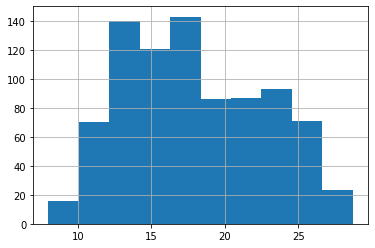

In [ ]:
GalpAberto.TEMPERATURA.hist()

In [ ]:
GalpTermico.describe()

,No,TEMPERATURA,UMIDADE,PTO ORVALHO,ITU
count,851.000000,851.000000,851.000000,851.000000,851.000000
mean,426.000000,28.509166,78.550157,24.113220,79.828893
std,245.806835,5.029326,11.851780,3.066311,6.702043
min,1.000000,20.200000,51.400000,14.600000,67.854777
25%,213.500000,23.383333,68.183333,21.700000,73.275590
50%,426.000000,28.233333,77.033333,23.933333,79.313030
75%,638.500000,33.700000,90.366667,26.866667,86.455778
max,851.000000,38.000000,96.533333,33.900000,94.164050


#Passo 6 - Carregar o arquivo de Produção Diária Unificado
- Este arquivo foi gerado no trabalho anterior unindo os 177 arquivos TXT enviados
- link do Git Hub para este trabalho citado acima: https://github.com/InstitutodaVinci3/Vancouver/blob/master/Producao_Diaria.ipynb

In [184]:
#prod_dia = pd.read_csv(path+ 'Prod_Diaria_Unificado.csv')
prod_dia = pd.read_excel('https://raw.githubusercontent.com/InstitutodaVinci3/Vancouver/master/Prod_Diaria_Unificado_dt.xls', sheet_name=1, na_values=['NaN','NA','N/A','',' '])
prod_dia

,Column1,Id_Animal,Hora_S1,Hora_S2,Hora_S3,Prod_S1,Prod_S2,Prod_S3,Data
0,0,653,08:00:00,15:30:00,,1584.0,788.0,,2017-09-01
1,1,2623,08:00:00,15:30:00,,1381.0,766.0,,2017-09-01
2,2,2624,08:00:00,15:30:00,,1263.0,1054.0,,2017-09-01
3,3,2662,09:30:00,NaN,,1364.0,NaN,,2017-09-01
4,4,3652,08:00:00,15:30:00,,1273.0,680.0,,2017-09-01
...,...,...,...,...,...,...,...,...,...
4027,67,4453,NaN,NaN,,NaN,NaN,,2017-10-26
4028,68,3538,NaN,NaN,,NaN,NaN,,2017-10-26
4029,69,3460,NaN,NaN,,NaN,NaN,,2017-10-26
4030,70,2483,NaN,NaN,,NaN,NaN,,2017-10-26


In [159]:
prod_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Column1    4032 non-null   int64         
 1   Id_Animal  4032 non-null   int64         
 2   Hora_S1    1966 non-null   object        
 3   Hora_S2    1862 non-null   object        
 4   Hora_S3    4032 non-null   object        
 5   Prod_S1    1966 non-null   float64       
 6   Prod_S2    1862 non-null   float64       
 7   Prod_S3    4032 non-null   object        
 8   Data       4032 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 283.6+ KB


In [ ]:
##prod_dia['Id_Animal'] = prod_dia['Id_Animal'].astype(int)
prod_dia["Prod_S1"] = pd.to_numeric(prod_dia['Prod_S1'], errors='coerce')
prod_dia["Prod_S2"] = pd.to_numeric(prod_dia['Prod_S2'], errors='coerce')
prod_dia["Prod_S3"] = pd.to_numeric(prod_dia['Prod_S3'], errors='coerce')

#prod_dia['Data'] = prod_dia['Data'].astype('string')
#prod_dia['Data'] = pd.to_datetime(prod_dia['Data'], format='%d/%m/%Y')
prod_dia

In [118]:
prod_dia=prod_dia.replace(r'^\s+$', np.nan, regex=True)

In [161]:
prod_dia['Prod_SF'] = np.where(pd.isna(prod_dia['Prod_S3']), prod_dia['Prod_S2'], prod_dia['Prod_S3'])
#DataFrame['column_name'] = numpy.where(condition, new_value, DataFrame.column_name)

In [162]:
prod_dia['Hora_SF'] = np.where(pd.isna(prod_dia['Hora_S3']), prod_dia['Hora_S2'], prod_dia['Hora_S3'])

In [163]:
prod_dia.head(10)

,Column1,Id_Animal,Hora_S1,Hora_S2,Hora_S3,Prod_S1,Prod_S2,Prod_S3,Data,Prod_SF,Hora_SF
0,0,653,08:00:00,15:30:00,,1584.0,788.0,NaN,2017-09-01,788.0,
1,1,2623,08:00:00,15:30:00,,1381.0,766.0,NaN,2017-09-01,766.0,
2,2,2624,08:00:00,15:30:00,,1263.0,1054.0,NaN,2017-09-01,1054.0,
3,3,2662,09:30:00,NaN,,1364.0,NaN,NaN,2017-09-01,NaN,
4,4,3652,08:00:00,15:30:00,,1273.0,680.0,NaN,2017-09-01,680.0,
5,5,4588,NaN,NaN,,NaN,NaN,NaN,2017-09-01,NaN,
6,6,4549,NaN,NaN,,NaN,NaN,NaN,2017-09-01,NaN,
7,7,4498,08:00:00,15:30:00,,1482.0,633.0,NaN,2017-09-01,633.0,
8,8,4448,08:00:00,15:30:00,,1308.0,676.0,NaN,2017-09-01,676.0,
9,9,4412,08:00:00,15:30:00,,1035.0,512.0,NaN,2017-09-01,512.0,


In [164]:
dataS1=[prod_dia['Id_Animal'],prod_dia['Hora_S1'],prod_dia['Prod_S1'],prod_dia['Data']]
#dataS1

In [165]:
headersS1 = ['Id_Animal','Hora', 'Producao', 'Data']
S1 = pd.concat(dataS1, axis=1, keys=headersS1)
S1['Sessao']='S1'
S1.head()

,Id_Animal,Hora,Producao,Data,Sessao
0,653,08:00:00,1584.0,2017-09-01,S1
1,2623,08:00:00,1381.0,2017-09-01,S1
2,2624,08:00:00,1263.0,2017-09-01,S1
3,2662,09:30:00,1364.0,2017-09-01,S1
4,3652,08:00:00,1273.0,2017-09-01,S1


In [166]:
dataSF=[prod_dia['Id_Animal'],prod_dia['Hora_SF'],prod_dia['Prod_SF'],prod_dia['Data']]

In [167]:
headersSF = ['Id_Animal','Hora', 'Producao', 'Data']
SF = pd.concat(dataSF, axis=1, keys=headersSF)
SF['Sessao']='S2'
SF.head()

,Id_Animal,Hora,Producao,Data,Sessao
0,653,,788.0,2017-09-01,S2
1,2623,,766.0,2017-09-01,S2
2,2624,,1054.0,2017-09-01,S2
3,2662,,NaN,2017-09-01,S2
4,3652,,680.0,2017-09-01,S2


In [168]:
lista=[S1,SF]
prod_dia_final = pd.concat(lista)
prod_dia_final.head(100)

,Id_Animal,Hora,Producao,Data,Sessao
0,653,08:00:00,1584.0,2017-09-01,S1
1,2623,08:00:00,1381.0,2017-09-01,S1
2,2624,08:00:00,1263.0,2017-09-01,S1
3,2662,09:30:00,1364.0,2017-09-01,S1
4,3652,08:00:00,1273.0,2017-09-01,S1
...,...,...,...,...,...
95,4577,NaN,NaN,2017-09-03,S1
96,4585,08:30:00,957.0,2017-09-03,S1
97,4575,NaN,NaN,2017-09-03,S1
98,4545,08:30:00,1251.0,2017-09-03,S1


In [169]:
prod_dia_final.tail(100)

,Id_Animal,Hora,Producao,Data,Sessao
3932,4550,,NaN,2017-10-25,S2
3933,4546,,NaN,2017-10-25,S2
3934,4548,,NaN,2017-10-25,S2
3935,4065,,NaN,2017-10-25,S2
3936,5408,,NaN,2017-10-25,S2
...,...,...,...,...,...
4027,4453,,NaN,2017-10-26,S2
4028,3538,,NaN,2017-10-26,S2
4029,3460,,NaN,2017-10-26,S2
4030,2483,,NaN,2017-10-26,S2


In [170]:
prod_dia_final['Producao'].isnull().sum()

4236

In [171]:
prod_dia_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8064 entries, 0 to 4031
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id_Animal  8064 non-null   int64         
 1   Hora       5998 non-null   object        
 2   Producao   3828 non-null   float64       
 3   Data       8064 non-null   datetime64[ns]
 4   Sessao     8064 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 378.0+ KB


In [172]:
prod_dia_final.dropna(0,inplace=True)

In [173]:
prod_dia_final['Timestamp'] = prod_dia_final['Data'].astype('string') + ' ' + prod_dia_final['Hora'].astype('string')
prod_dia_final['Timestamp'] = pd.to_datetime(prod_dia_final['Timestamp'])

In [174]:
tv

,Fase,Data,Dia_Experimento,Id_Animal,Dieta,Trat,Periodo,Hora,Temp_Vaginal,Timestamp
0,1,2017-07-20,12,2416,2,2,0,07:30:00,NaN,2017-07-20 07:30:00
1,1,2017-07-20,12,2416,2,2,0,08:00:00,NaN,2017-07-20 08:00:00
2,1,2017-07-20,12,2416,2,2,0,08:30:00,NaN,2017-07-20 08:30:00
3,1,2017-07-20,12,2416,2,2,0,09:00:00,NaN,2017-07-20 09:00:00
4,1,2017-07-20,12,2416,2,2,0,09:30:00,NaN,2017-07-20 09:30:00
...,...,...,...,...,...,...,...,...,...,...
29047,2,2017-09-27,26,3500,2,3,1,13:30:00,NaN,2017-09-27 13:30:00
29048,2,2017-09-27,26,3500,2,3,1,14:00:00,NaN,2017-09-27 14:00:00
29049,2,2017-09-27,26,3500,2,3,1,14:30:00,NaN,2017-09-27 14:30:00
29050,2,2017-09-27,26,3500,2,3,1,15:00:00,NaN,2017-09-27 15:00:00


In [144]:
prod_dia_final.dtypes

Id_Animal             int64
Hora                 object
Producao            float64
Data         datetime64[ns]
Sessao               object
Timestamp    datetime64[ns]
dtype: object

In [145]:
tv.dtypes

Fase                        int64
Data               datetime64[ns]
Dia_Experimento             int64
Id_Animal                   int64
Dieta                       int64
Trat                        int64
Periodo                     int64
Hora                       string
Temp_Vaginal              float64
Timestamp          datetime64[ns]
dtype: object

In [175]:
prod_dia_final

,Id_Animal,Hora,Producao,Data,Sessao,Timestamp
0,653,08:00:00,1584.0,2017-09-01,S1,2017-09-01 08:00:00
1,2623,08:00:00,1381.0,2017-09-01,S1,2017-09-01 08:00:00
2,2624,08:00:00,1263.0,2017-09-01,S1,2017-09-01 08:00:00
3,2662,09:30:00,1364.0,2017-09-01,S1,2017-09-01 09:30:00
4,3652,08:00:00,1273.0,2017-09-01,S1,2017-09-01 08:00:00
...,...,...,...,...,...,...
4008,5408,,517.0,2017-10-26,S2,2017-10-26 00:00:00
4009,4584,,578.0,2017-10-26,S2,2017-10-26 00:00:00
4010,4572,,291.0,2017-10-26,S2,2017-10-26 00:00:00
4011,4554,,514.0,2017-10-26,S2,2017-10-26 00:00:00


**Nota:** Necessário verificar porque o describe não está trazendo as estat´sticas para as demais colunas do dataframe

# Passo 7 - Juntar os arquivos novos em um único Data Frame

### A junção dos DataFrames que posseum o **Id de Animal** como chave deve ser priorizado
- tv, cons, glu, comp podem ser concatenados usando **Animal Id, Data e Hora**
- Depois pode-se concatenar com o arquivo Produção DIaria unificado, criado com os dados anteriores 
- Datalogger concatenado por Data e hora ?


#Passo 8 - Inner Join - Merge


In [179]:
df_merge=prod_dia_final.merge(tv, on=['Id_Animal', 'Timestamp'], how='inner')
#df_merge = pd.merge(GalpAberto, tv, left_on='timestamp', right_on='timestamp', suffixes=('_left','_right'))
df_merge.head(30)

,Id_Animal,Hora_x,Producao,Data_x,Sessao,Timestamp,Fase,Data_y,Dia_Experimento,Dieta,Trat,Periodo,Hora_y,Temp_Vaginal
0,653,08:00:00,1424.0,2017-09-12,S1,2017-09-12 08:00:00,2,2017-09-12,11,1,1,0,08:00:00,NaN
1,2623,08:30:00,3005.0,2017-09-12,S1,2017-09-12 08:30:00,2,2017-09-12,11,2,2,0,08:30:00,NaN
2,2624,08:00:00,1358.0,2017-09-12,S1,2017-09-12 08:00:00,2,2017-09-12,11,2,3,0,08:00:00,NaN
3,2662,08:00:00,1341.0,2017-09-12,S1,2017-09-12 08:00:00,2,2017-09-12,11,2,1,0,08:00:00,NaN
4,3652,08:00:00,1247.0,2017-09-12,S1,2017-09-12 08:00:00,2,2017-09-12,11,1,3,0,08:00:00,NaN
5,4498,08:00:00,1232.0,2017-09-12,S1,2017-09-12 08:00:00,2,2017-09-12,11,1,1,0,08:00:00,NaN
6,4448,08:00:00,1394.0,2017-09-12,S1,2017-09-12 08:00:00,2,2017-09-12,11,1,3,0,08:00:00,NaN
7,4412,08:00:00,1108.0,2017-09-12,S1,2017-09-12 08:00:00,2,2017-09-12,11,1,2,0,08:00:00,NaN
8,4021,08:00:00,1506.0,2017-09-12,S1,2017-09-12 08:00:00,2,2017-09-12,11,2,1,0,08:00:00,NaN
9,3579,08:00:00,1362.0,2017-09-12,S1,2017-09-12 08:00:00,2,2017-09-12,11,1,2,0,08:00:00,NaN


In [182]:
df_merge[df_merge['Id_Animal']==3500]

,Id_Animal,Hora_x,Producao,Data_x,Sessao,Timestamp,Fase,Data_y,Dia_Experimento,Dieta,Trat,Periodo,Hora_y,Temp_Vaginal
10,3500,08:00:00,1376.0,2017-09-12,S1,2017-09-12 08:00:00,2,2017-09-12,11,2,3,0,08:00:00,NaN
28,3500,08:30:00,1465.0,2017-09-14,S1,2017-09-14 08:30:00,2,2017-09-14,13,2,3,0,08:30:00,38.625
46,3500,08:30:00,1399.0,2017-09-13,S1,2017-09-13 08:30:00,2,2017-09-13,12,2,3,0,08:30:00,NaN
64,3500,08:30:00,1465.0,2017-09-15,S1,2017-09-15 08:30:00,2,2017-09-15,14,2,3,1,08:30:00,38.625
82,3500,08:00:00,1424.0,2017-09-16,S1,2017-09-16 08:00:00,2,2017-09-16,15,2,3,1,08:00:00,38.500
100,3500,08:30:00,1539.0,2017-09-17,S1,2017-09-17 08:30:00,2,2017-09-17,16,2,3,1,08:30:00,38.250
118,3500,08:00:00,1436.0,2017-09-19,S1,2017-09-19 08:00:00,2,2017-09-19,18,2,3,1,08:00:00,38.375
136,3500,08:00:00,1546.0,2017-09-18,S1,2017-09-18 08:00:00,2,2017-09-18,17,2,3,1,08:00:00,38.500
154,3500,08:30:00,1420.0,2017-09-21,S1,2017-09-21 08:30:00,2,2017-09-21,20,2,3,1,08:30:00,38.750
172,3500,08:30:00,1558.0,2017-09-20,S1,2017-09-20 08:30:00,2,2017-09-20,19,2,3,1,08:30:00,38.750


In [180]:
tv

,Fase,Data,Dia_Experimento,Id_Animal,Dieta,Trat,Periodo,Hora,Temp_Vaginal,Timestamp
0,1,2017-07-20,12,2416,2,2,0,07:30:00,NaN,2017-07-20 07:30:00
1,1,2017-07-20,12,2416,2,2,0,08:00:00,NaN,2017-07-20 08:00:00
2,1,2017-07-20,12,2416,2,2,0,08:30:00,NaN,2017-07-20 08:30:00
3,1,2017-07-20,12,2416,2,2,0,09:00:00,NaN,2017-07-20 09:00:00
4,1,2017-07-20,12,2416,2,2,0,09:30:00,NaN,2017-07-20 09:30:00
...,...,...,...,...,...,...,...,...,...,...
29047,2,2017-09-27,26,3500,2,3,1,13:30:00,NaN,2017-09-27 13:30:00
29048,2,2017-09-27,26,3500,2,3,1,14:00:00,NaN,2017-09-27 14:00:00
29049,2,2017-09-27,26,3500,2,3,1,14:30:00,NaN,2017-09-27 14:30:00
29050,2,2017-09-27,26,3500,2,3,1,15:00:00,NaN,2017-09-27 15:00:00


In [178]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29052 entries, 0 to 29051
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Id_Animal        29052 non-null  int64         
 1   Hora_x           542 non-null    object        
 2   Producao         542 non-null    float64       
 3   Data_x           542 non-null    datetime64[ns]
 4   Sessao           542 non-null    object        
 5   Timestamp        29052 non-null  datetime64[ns]
 6   Fase             29052 non-null  int64         
 7   Data_y           29052 non-null  datetime64[ns]
 8   Dia_Experimento  29052 non-null  int64         
 9   Dieta            29052 non-null  int64         
 10  Trat             29052 non-null  int64         
 11  Periodo          29052 non-null  int64         
 12  Hora_y           29052 non-null  string        
 13  Temp_Vaginal     26051 non-null  float64       
dtypes: datetime64[ns](3), float64(2), int6

In [ ]:
df_merge=GalpAberto.merge(tv, on='timestamp', how='right')
#df_merge = pd.merge(GalpAberto, tv, left_on='timestamp', right_on='timestamp', suffixes=('_left','_right'))
df_merge.head(30)

In [ ]:
GalpAberto

,No,DATA,HORA,TEMPERATURA,UMIDADE,PTO ORVALHO,ITU,timestamp
0,1,2017-07-21,07:00:00,13.90,81.55,10.75,57.119445,2017-07-21 07:00:00
1,2,2017-07-21,07:30:00,13.65,86.80,11.45,56.673818,2017-07-21 07:30:00
2,3,2017-07-21,08:00:00,14.70,86.85,12.45,58.426730,2017-07-21 08:00:00
3,4,2017-07-21,08:30:00,15.90,86.25,13.55,60.421862,2017-07-21 08:30:00
4,5,2017-07-21,09:00:00,17.05,83.70,14.25,62.269541,2017-07-21 09:00:00
...,...,...,...,...,...,...,...,...
845,846,2017-07-08,21:30:00,13.90,85.70,11.50,57.097077,2017-07-08 21:30:00
846,847,2017-07-08,22:00:00,13.25,85.35,10.80,56.023236,2017-07-08 22:00:00
847,848,2017-07-08,22:30:00,12.75,86.65,10.55,55.173946,2017-07-08 22:30:00
848,849,2017-07-08,23:00:00,12.40,86.55,10.20,54.592228,2017-07-08 23:00:00


In [148]:
tv.head(100)

,Fase,Data,Dia_Experimento,Id_Animal,Dieta,Trat,Periodo,Hora,Temp_Vaginal,Timestamp
0,1,2017-07-20,12,2416,2,2,0,07:30:00,NaN,2017-07-20 07:30:00
1,1,2017-07-20,12,2416,2,2,0,08:00:00,NaN,2017-07-20 08:00:00
2,1,2017-07-20,12,2416,2,2,0,08:30:00,NaN,2017-07-20 08:30:00
3,1,2017-07-20,12,2416,2,2,0,09:00:00,NaN,2017-07-20 09:00:00
4,1,2017-07-20,12,2416,2,2,0,09:30:00,NaN,2017-07-20 09:30:00
...,...,...,...,...,...,...,...,...,...,...
95,1,2017-07-22,14,2416,2,2,1,07:01:00,39.000,2017-07-22 07:01:00
96,1,2017-07-22,14,2416,2,2,1,07:31:00,39.000,2017-07-22 07:31:00
97,1,2017-07-22,14,2416,2,2,1,08:01:00,39.000,2017-07-22 08:01:00
98,1,2017-07-22,14,2416,2,2,1,08:31:00,39.000,2017-07-22 08:31:00


In [149]:
tv.tail(100)

,Fase,Data,Dia_Experimento,Id_Animal,Dieta,Trat,Periodo,Hora,Temp_Vaginal,Timestamp
28952,2,2017-09-25,24,3500,2,3,1,14:00:00,39.125,2017-09-25 14:00:00
28953,2,2017-09-25,24,3500,2,3,1,14:30:00,39.125,2017-09-25 14:30:00
28954,2,2017-09-25,24,3500,2,3,1,15:00:00,39.000,2017-09-25 15:00:00
28955,2,2017-09-25,24,3500,2,3,1,15:30:00,39.250,2017-09-25 15:30:00
28956,2,2017-09-25,24,3500,2,3,1,16:00:00,39.000,2017-09-25 16:00:00
...,...,...,...,...,...,...,...,...,...,...
29047,2,2017-09-27,26,3500,2,3,1,13:30:00,NaN,2017-09-27 13:30:00
29048,2,2017-09-27,26,3500,2,3,1,14:00:00,NaN,2017-09-27 14:00:00
29049,2,2017-09-27,26,3500,2,3,1,14:30:00,NaN,2017-09-27 14:30:00
29050,2,2017-09-27,26,3500,2,3,1,15:00:00,NaN,2017-09-27 15:00:00


In [157]:
prod_dia_final.head(1150)

,Id_Animal,Hora,Producao,Data,Sessao,Timestamp
0,6530,08:00:00,1584.0,2017-09-01,S1,2017-09-01 08:00:00
1,26230,08:00:00,1381.0,2017-09-01,S1,2017-09-01 08:00:00
2,26240,08:00:00,1263.0,2017-09-01,S1,2017-09-01 08:00:00
3,26620,09:30:00,1364.0,2017-09-01,S1,2017-09-01 09:30:00
4,36520,08:00:00,1273.0,2017-09-01,S1,2017-09-01 08:00:00
...,...,...,...,...,...,...
1810,44210,08:30:00,849.0,2017-09-25,S1,2017-09-25 08:30:00
1811,40210,08:30:00,1391.0,2017-09-25,S1,2017-09-25 08:30:00
1812,35790,08:00:00,1338.0,2017-09-25,S1,2017-09-25 08:00:00
1814,35000,08:30:00,1496.0,2017-09-25,S1,2017-09-25 08:30:00
